# Processamento de linguagem natural e modelo de análise de sentimento.

A fim de que seja possível comparar os tópicos abaixo descritos com os itens explicitados pelo barema, encontra-se, nessa célula, um índice comparativo entre ambas partes. Ele foi feito para facilitar a correção dos professores e permitir a existência de uma autonomia na nomenclatura das células de organização. 
- Instalação -> tópico 1.0
- Testes isolados - >  tópico 3.8 
- Definição de funções -> tópico 3.1 a 3.7
- Testes das funções -> tópico 4.3
- Análise descritiva -> tópico 2.0
- Pré processamento -> tópico 3.0
- Pipeline -> tópico 4.3
- Modelo Bag of words -> tópico 4.0


## 1.0 Instalação

Nessa parte do notebook realiza-se a instalação das bibliotecas que serão utilizadas no decorrer do código, bem como a importação da base de dados que baseia todas as posteriores análises. 

### 1.1 Importação das bibliotecas

In [ ]:
# instalação de pacotes para remoção de acentos
!pip install unidecode
# Instalando biblioteca Python "emoji"
!pip install emoji
# Instalação de biblioteca para remoção de stop words
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=8ad4bf4adb2e775aa1b77369d6d5d76c01f884a23f0f54ff3e5bfbe281cd7eb7
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 44.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled 

In [ ]:
#importação das bibliotecas:
import pandas as pd
import numpy as np
# bibliotecas utilizadas para tokenização
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#biblioteca para tokenização 
from keras.preprocessing.text import Tokenizer
# bibliotecas utilizadas para remoção de stop words
import nltk
nltk.download('punkt')
#importação das bibliotecas para remoção de Stop Words
import spacy
nlp = spacy.cli.download('pt_core_news_sm')
nlp = spacy.load('pt_core_news_sm')
# bibliotecas para remoção de acentos
from unidecode import unidecode
# bibliotecas utilizadas para o tratamento de abreviações
import re
# Instalando biblioteca Python "emoji"
import emoji
# importação de biblioteca para exportação do modelo
import pickle
# importação de biblioteca para separar treino e teste
from sklearn.model_selection import train_test_split
# importação do naive Bayes
from sklearn.naive_bayes import GaussianNB
# Importação de bibliotecas para revocação
from sklearn.metrics import recall_score
# importação de bilbioteca para matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# importação de biblioteca para Word2Vec Skipgram
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


### 1.2 Criação da tabela 

In [ ]:
#Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')
#importação da base de dados:
df = pd.read_excel('/content/drive/MyDrive/Modulo_6_grupo_1/2-base_10052023-G1.xlsx')
novas_colunas = {
    '"dataPublicada"': 'dataPublicada',
    '"autor"': 'autor',
    '"texto"': 'texto',
    '"sentimento"': 'targetSentimento',
    '"tipoInteracao"': 'tipoInteracao',
    '"anomalia"': 'anomalia',
    '"probabilidadeAnomalia"': 'probabilidadeAnomalia',
    '"linkPost"': 'linkPost',
    '"processado"': 'processado',
    '"contemHyperlink"': 'contemHyperlink'
}

# Renomear as colunas
df = df.rename(columns=novas_colunas)
# Remover linhas sem a coluna "texto"
df = df.dropna(subset=['texto'])
# Filtrar as linhas com base em diferentes condições
df = df[(df['anomalia'] != 1) & (df['autor'] != 'btgpactual') & (df['contemHyperlink'] != 1) & (df['probabilidadeAnomalia'] <= 50)]
# Redefinir o índice
df = df.reset_index(drop=True)

Mounted at /content/drive


##### Balanceamento dos dados com undersampling

In [ ]:
# # Separa os elementos das classes POSITIVE, NEUTRAL e NEGATIVE em três tabelas
# df_classe1 = df.loc[df['sentimento'] == "POSITIVE"]
# df_classe2 = df.loc[df['sentimento'] == "NEUTRAL"]
# df_classe3 = df.loc[df['sentimento'] == "NEGATIVE"]

# # Mantém 988 elementos nas tabelas df_classe1 e df_classe2
# df_classe1 = df_classe1.sample(n=988, random_state=42)
# df_classe2 = df_classe2.sample(n=988, random_state=42)

# # Concatena as três tabelas em uma tabela df1
# df1 = pd.concat([df_classe1, df_classe2, df_classe3], ignore_index=True)

In [ ]:
# # Embaralha as linhas da tabela na variável df
# df = df1.sample(frac=1).reset_index(drop=True)

# # Exibe a tabela resultante
# df['sentimento']

## 2.0 Análise descritiva dos dados

A Análise Descritiva dos Dados é uma técnica importante para obter insights e compreender as características dos dados sem a utilização de modelos estatísticos complexos.

### 2.1 Colunas

Célula que permite a visualização de todas as colunas do dataframe:

In [ ]:
df.columns

Index(['id', 'dataPublicada', 'autor', 'texto', 'targetSentimento',
       'tipoInteracao', 'anomalia', 'probabilidadeAnomalia', 'linkPost',
       'processado', 'contemHyperlink'],
      dtype='object')


1. **Coluna Id:** A coluna id apresenta o index para visualização da planilha e pode ser usada como chave primária do comentário. No que diz respeito à utilização no modelo, essa coluna não confere relevância para a sua construção, visto que sua utilidade está atrelada apenas ao fato de garantir que cada linha possua um identificador único. Portanto, *essa coluna não será utilizada.*

2. **Coluna dataPublicada:** A coluna data publicada refere-se a data de publicação do comentário. Para a construção do modelo **bag of words**, essa coluna não apresenta relevância, portanto, *não será utilizada*. Posteriormente, sua utilização pode se fazer necessária para a averiguação dos períodos das campanhas.

3. **Coluna autor:** A coluna autor é referente à conta do instagram que realizou o comentário na postagem. Essa coluna não será utilizada diretamente pelo modelo bag of words, mas será importante para o agrupamento de comentários referente à empresa BTG. 

4. **Coluna texto:** A coluna texto se refere ao texto presente no comentário realizado. Para a construção do modelo, essa é a coluna com maior relevância, visto que são justamente os conteúdos dos comentários que precisam ser analisados pelo modelo. 

5. **Coluna sentimento:** A coluna sentimento é, justamente, o target da classificação que precisamos fazer dos dados. Essa coluna será utilizada para o treinamento posterior do modelo, visto que apresenta o resultado esperado. Contudo, diante de uma análise manual das classificações, foi possível perceber que alguns comentários foram classificados de maneira errônea, dado que possuem um teor positivo mas foram classificados como negativos ou neutros.

6. **Coluna tipoInteracao:** A coluna tipo interação informa o tipo de interação a qual aquele comentário pertence, como, por exemplo, uma resposta ou como marcação. Essa coluna, inicialmente, não será utilizada para a construção do modelo bag of words.

7. **Coluna anomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

8. **Coluna probabilidadeAnomalia:**  Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

9. **Coluna linkPost:** Essa coluna possui o link referente a postagem da qual foram retirados os comentários. Todos os comentários referentes à mesma postagem possuem o link igual. Pensando na análise de sentimento, essa coluna não apresenta relevância, portanto, não será utilizada. 

10. **Coluna processado:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.

11. **Coluna contemHyperlink:** Não possuímos informações suficientes para definir qual é o significado dessa coluna. Portanto, ainda não pode-se definir se ela será utilizada ou não no decorrer do desenvolvimento do projeto. Por ora, essa coluna não será utilizada.



### 2.2 Funções

Abaixo estão listadas todas as funções presentes nesse notebook e o que elas fazem:
1. **remocaoAcentos:** função que remove todos os acentos presentes nos comentários da coluna texto.
2. **tratamentoMaiusculas:** função que trata todas as letras maiúsculas dos comentários presentes na coluna texto, passando-as para caixa baixa.
3. **conversaoEmojis:** função que converte todo emoji presente na coluna texto para seu significado em inglês.
4. **tratamentoAbreviacoes:** função que converte todas as abreviações para seu significado real, além de remover todas as pontuações e diferentes tipos de marcações comumente utilizadas em redes sociais.
5. **tokenizacaoPalavra:** função que tokeniza em palavras os comentários, separando cada uma delas do todo.
6. **tokenizacaoFrase:** função que tokeniza em frases os comentários, separando cada uma das frases, sejam elas do mesmo comentário ou de comentários diferentes.
7. **remocaoStopWords:** função que remove todas as stopwords presentes nos comentários da coluna texto.
8. **bagOfWords:** função para chamar o modelo de bag of words e salvar um vetor de recorrencia.
9. **pipelineBow:** função que define a pipeline que será utilizada no modelo, com todos os pré-processamentos realizados e o modelo BOW aplicado para gerar um dicionário e um vetor.
10. **contarPalavras:** função para contar quantas vezes cada palavra se repetiu no modelo bag of words.
11. **gerarNuvemPalavras:** função para gerar uma nuvem de palavras utilizando os resultados do modelo bag of words.

###2.3 Visualização gráfica de dados

#### 2.3.1 Valores nulos

Visualização da proporção entre o número de linhas que possuem algum tipo de valor nulo e as linhas que não os possuem. 

id                       0
dataPublicada            0
autor                    0
texto                    0
targetSentimento         0
tipoInteracao            0
anomalia                 0
probabilidadeAnomalia    0
linkPost                 0
processado               0
contemHyperlink          0
dtype: int64


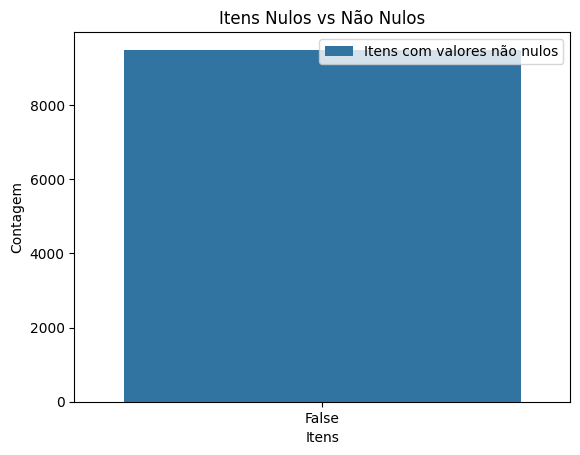

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# visualizando todos os itens nulos
print(df.isnull().sum())

# criando um gráfico de barras para comparar os itens nulos e não nulos
sns.countplot(x=df.isnull().any(axis=1), hue=df.isnull().any(axis=1))
plt.title("Itens Nulos vs Não Nulos")
plt.xlabel("Itens")
plt.ylabel("Contagem")
plt.legend(labels=['Itens com valores não nulos', 'Itens com valores nulos'])
plt.show()

Visualização de ítens nulos em cada uma das colunas do dataframe:

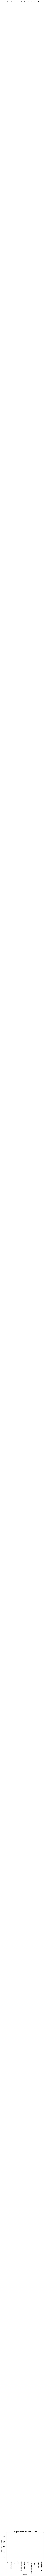

In [ ]:
# contando os valores nulos em cada coluna
null_counts = df.isnull().sum()

# criando um gráfico de barras para mostrar a contagem de valores nulos em cada coluna
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90) # adicionando a rotação de 90 graus nas legendas

# adicionando as etiquetas de texto no topo de cada barra
for i, v in enumerate(null_counts.values):
    plt.text(i, v+10, str(v), ha='center', fontsize=12)

# configurando os rótulos dos eixos e o título do gráfico
plt.xlabel("Colunas")
plt.ylabel("Contagem de Valores Nulos")
plt.title("Contagem de Valores Nulos por Coluna")

# exibindo o gráfico
plt.show()

#### 2.2.2 Agrupamento por autores

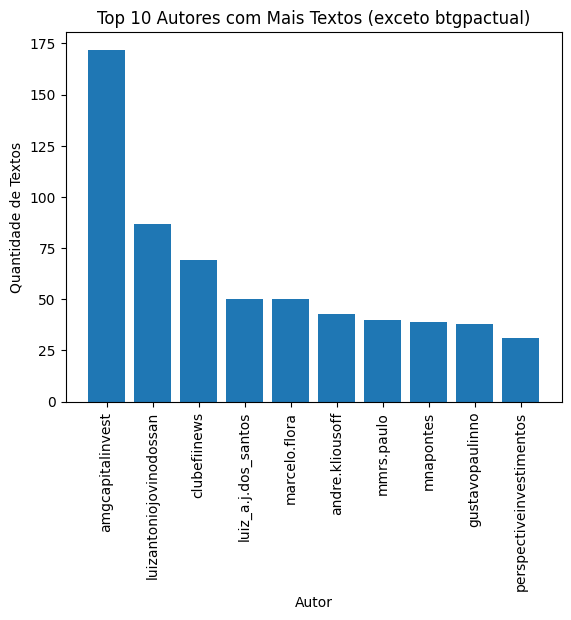

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupamento dos textos por autor, excluindo o "btg pactual"
textosPorAutor = df.query("autor != 'btgpactual'").groupby('autor')['texto'].count().reset_index()

# Ordenação dos autores por quantidade de textos
textosPorAutor = textosPorAutor.sort_values('texto', ascending=False).reset_index(drop=True)

# Seleção dos 10 autores com mais textos
top10Autores = textosPorAutor.head(10)

# Gráfico de barras com a quantidade de textos por autor
plt.bar(top10Autores['autor'], top10Autores['texto'])
plt.xticks(rotation=90)
plt.xlabel('Autor')
plt.ylabel('Quantidade de Textos')
plt.title('Top 10 Autores com Mais Textos (exceto btgpactual)')
plt.show()


### Análise dos sentimentos

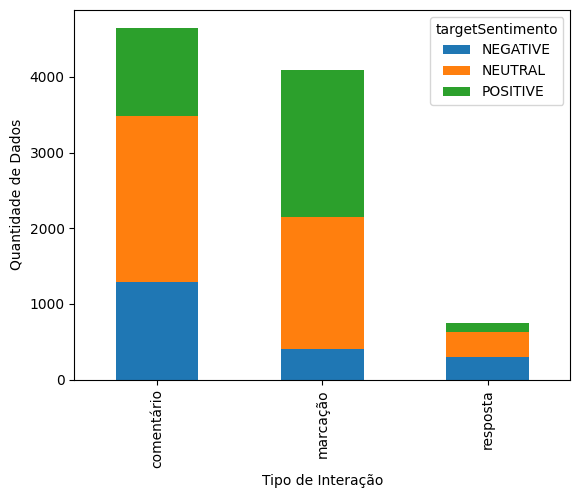

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a quantidade de dados para cada combinação de marcação e tipo de interação
contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# Criar o gráfico de barras agrupadas
contagem.plot(kind='bar', stacked=True)

# Configurar os rótulos dos eixos
plt.xlabel('Tipo de Interação')
plt.ylabel('Quantidade de Dados')

# Exibir o gráfico
plt.show()


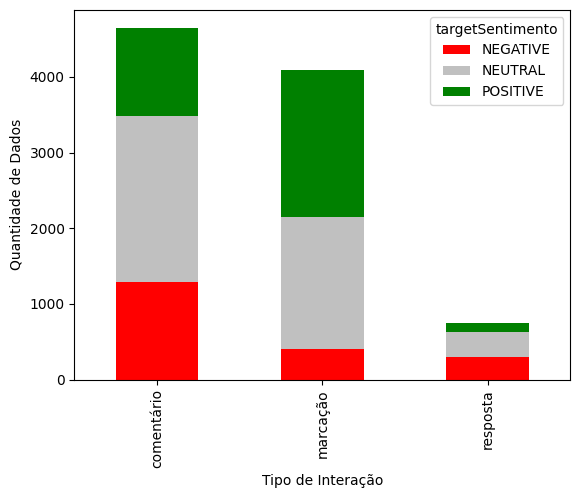

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a quantidade de dados para cada combinação de marcação e tipo de interação
contagem = df.groupby(['tipoInteracao', 'targetSentimento']).size().unstack(fill_value=0)

# Cores das colunas
cores = [ '#FF0000', '#C0C0C0', '#008000']

# Criar o gráfico de barras agrupadas com as cores personalizadas
contagem.plot(kind='bar', stacked=True, color=cores)

# Configurar os rótulos dos eixos
plt.xlabel('Tipo de Interação')
plt.ylabel('Quantidade de Dados')

# Exibir o gráfico
plt.show()


## 3.0 Pré processamento dos dados

O pré processamento dos dados é uma técnica que consiste em uma série de etapas que buscam preparar os dados para uma análise posterior, eliminando informações desnecessárias, corrigindo erros e padronizando o formato dos dados. 
Essa é uma etapa muito importante porque, muitas vezes, dados textuais são frequentemente não estruturados, o que significa que não seguem um formato padronizado ou organizado, dificultando a análise e extração de informações relevantes.

### 3.1 Remoção de acentos

Para garantir que um texto seja processado de forma consistente, é importante realizar a normalização dos seus componentes. Nesse sentido, a remoção de acentos é uma etapa fundamental, já que isso ajuda o algoritmo a compreender com mais precisão o que o texto está dizendo. Além disso, a ausência de acentos reduz o risco de que o algoritmo interprete de maneira diferente duas palavras idênticas, mas que tenham sido acentuadas de formas distintas ou incorretas. Em resumo, a remoção de acentos é uma prática essencial no pré-processamento de textos para aprimorar a qualidade e a eficácia da análise de dados em linguagem natural.

In [ ]:
#Código para remoção dos acentos
def remocaoAcentos(dataframe):
    dataframe = dataframe.applymap(lambda x: unidecode(str(x)))
    return dataframe

Teste isolado

In [ ]:
# # Teste isolado da função remoção de acentos
# remocaoAcentos(df)

### 3.2 Remoção letras maiusculas

O tratamento de letras maiúsculas é importante porque, muitas vezes, a diferença entre letras maiúsculas e minúsculas pode impactar negativamente a análise do algoritmo, tendo em vista que ele pode interpretar as palavras como diferentes em determinadas situações. Esse problema pode levar a resultados imprecisos, tendo em vista que, diante do objetivo de contar a frequência de palavras, essas diferenças garantem que as palavras sejam contadas de maneira distinta. 

In [ ]:
def tratamentoMaiusculas(dataframe):
    # Pré-processamento das letras maiúsculas
    dataframe = dataframe.applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Exibição dos dados pré-processados
    return dataframe

Teste isolado

In [ ]:
# #teste isolado da função tratamento Maiúsculas
# tratamentoMaiusculas(df)

### 3.3 Lematização

A lematização é uma técnica utilizada a fim de reduzir palavras flexionadas para sua forma básica. Ela representa as palavras através do infinitivo dos verbos e singular dos substantivos e adjetivos. Esse processo também leva em consideração o contexto inserido de cada palavra e resolve o problema da ambiguidade lexical, onde uma mesma palavra pode ter múltiplos significados.

In [ ]:
# Função de lematização
def textoLemmatizado(coluna):
    textosLemmatizados = []
    for texto in coluna:
        # Processa o texto com o modelo do Spacy
        doc = nlp(texto)
        # Lematiza cada token no documento
        lemmas = [token.lemma_ for token in doc]
        # Junta os lemmas em um único texto
        textoLemmatizado = ' '.join(lemmas)
        textosLemmatizados.append(textoLemmatizado)
    return textosLemmatizados

In [ ]:
# #Teste isolado:
# resultado = textoLemmatizado(df['texto'])
# resultado

### 3.4 Tratamento de emojis

Emojis são muito utilizados por usuários de redes sociais, ajudando-os, assim, a expressar emoções e sentimentos. Portanto, para melhor entender o sentido de uma mensagem, o tratamento de emojis podem fornecer uma melhor precisão para a análise e uma classificação mais precisa dos sentimentos de uma mensagem.

In [ ]:
# Função para converter emojis em texto.
# A função recebe dois argumentos. O dataframe e a coluna a ser tratada, e retorna o dataframe.
def conversaoEmojis(coluna):
    coluna = coluna.apply(emoji.demojize)
    return coluna

Teste isolado

In [ ]:
# # Teste isolado da função converter emoji em texto
# conversaoEmojis(df['texto'])

### 3.5 Tratamento de abreviações e pontuações

O tratamento de abreviações é importante porque garante que o algoritmo de processamento de linguagem natural interprete corretamente o significado do texto. Ao substituir abreviações por suas formas completas, o texto se torna mais legível e compreensível para o algoritmo que realizará o processamento.

In [ ]:
   
def tratamentoAbreviacoes(coluna):    
    coluna = coluna.astype(str)
    coluna.str.lower()
# Dicionário com as abreviações e suas expansões
    abreviacoes = {
        r'\bvc\b': 'você',
        r'\btbm\b': 'também',
        r'\bpq\b': 'porque',
        r'\bmt\b': 'muito',
        r'\bmto\b':'muito',
        r'\bblz\b': 'beleza',
        r'\bjah\b': 'já',
        r'\bbj\b': 'beijo',
        r'\bflw\b': 'falou',
        r'\bvlw\b': 'valeu',
        r'\bkrl\b': 'caralho',
        r'\bqnd\b': 'quando',
        r'\bfds\b': 'fim de semana',
        r'\bqq\b': 'qualquer',
        r'\bmsg\b': 'mensagem',
        r'\bpra\b': 'para',
        r'\bp\b': 'para',
        r'\bpqp\b': 'puta que pariu',
        r'\bvlh\b': 'velho',
        r'\bnss\b': 'nossa',
        r'\bngm\b': 'ninguém',
        r'\bqm\b': 'quem',
        r'\bobs\b': 'observação',
        r'\bqt\b': 'quanto',
        r'\btbm ñ\b': 'também não',
        r'\bpf\b': 'por favor',
        r'\bpdc\b': 'pode crer',
        r'\btalkei\b': 'ok',
        r'\bd+\b': 'demais',
        r'\bdms\b': 'demais',
        r'\bsqn\b': 'só que não',
        r'\bmsm\b': 'mesmo',
        r'\bn/ao\b': 'não',
        r'\bn/\b': 'não',
        r'\bblz\b': 'beleza',
        r'\bq\b': 'que',
        r'\btd\b': 'tudo',
        r'\bpfvr\b': 'por favor',
        r'\bgnt\b': 'gente',
        r'\bto\b': 'estou',
        r'\bvcs\b': 'vocês',
        r'\bn/oa\b': 'não',
        r'\bsla\b': 'sei lá',
        r'\bflws\b': 'falou',
        r'\bbjos\b': 'beijos',
        r'\bkd\b': 'cadê',
        r'\blgl\b': 'legal',
        r'\bnum\b': 'número',
        r'\bjá q\b': 'já que',
        r'\bmano\b': 'irmão',
        r'\bpke\b': 'porque',
        r'\bpr\b': 'para',
        r'\btpm\b': 'tensão pré-menstrual',
        r'\btá\b': 'está',
        r'\bqmto\b': 'muito',
        r'\bñ\b': 'não',
        r'\bvamu\b': 'vamos',
        r'\btmj\b': 'estamos juntos',
        r'[0-9]': '',
        r'@\w+': '',
        r'[^\w\s]': '',
        r'\bwww\.[^\s]*': '',
        r'\bola\b': '',
        r'\n': '',
        r'\bbtg\b': '',
        r'\bpactual\b': ''
    }

    # Aplica a substituição de cada abreviação no dataframe
    for abreviacao, expansao in abreviacoes.items():
        coluna= coluna.apply(lambda x: re.sub(abreviacao, expansao, x, flags=re.IGNORECASE))
    
    return coluna

Teste isolado:

In [ ]:
# #teste isolado
# tratamentoAbreviacoes(df['texto'])

### 3.6 Tokenização

A tokenização é um processo de pré-processamento utilizado para dividir os valores de uma coluna em pedaços menores, como palavras ou frases. Cada pedaço, conhecido como token, recebe um valor específico para identificação. Esse processo torna o texto mais gerenciável e facilita a análise e os processamentos subsequentes dos dados.

Função para gerar um dicionario, com os tokens

In [ ]:
#definição de função para tokenização em palavras
def tokenizacaoPalavra(comentarios):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(comentarios)
  return tokenizer

Tokenização por frase

In [ ]:
# definição de função para tokenização em frases
def tokenizacaoFrase(coluna):
  comentarios = coluna.values
  tokenFrase = []
  for comentarios in comentarios:
    tokenFrase.append(sent_tokenize(comentarios))
  return tokenFrase

Função para gerar tokens de palavras, referentes a cada frase

In [ ]:
def tokenizar(coluna):
    # Tokeniza as frases
    tokensPalavras = nltk.word_tokenize(coluna)
    return tokensPalavras

Testes isolados:

Geração de dicionario.

In [ ]:
# tokenizacaoPalavra(df['texto'])

Tokenizando frases.

In [ ]:
# tokenizacaoFrase(df['texto'])

Tokenizando as palavras de cada post individualmente

In [ ]:
# resultado = df['texto'].apply(tokenizar)
# resultado

### 3.7 Remoção de stopwords


A remoção dos Stop Words é um pré-processamento importante pois elimina palavras irrelevantes que podem prejudicar a precisão do modelo final, como artigos, preposições, conjunções, entre outros conectores. Esse tratamento ajuda na eficácia da classificação de texto  e na redução tanto do vocabulário quanto de ruídos (palavras que não têm um valor semântico significativo).

In [ ]:
def remocaoStopWords(coluna):
    listaSemStopWords = []
    for texto in coluna:
        # converte o texto em um documento do Spacy
        doc = nlp(texto)
        # filtra os tokens que não são stop words
        tokenSemStopwords = [token.text for token in doc if not token.is_stop]
        # adiciona a lista de frases sem stop words
        listaSemStopWords.append(' '.join(tokenSemStopwords))
    # substitui a coluna original pelos textos sem stop words
    coluna[:] = listaSemStopWords
    return coluna

Teste isolado

In [ ]:
# remocaoStopWords(df['texto'])

### 3.8 Extração de hashtags

A extração de hashtags é o processo de identificar e extrair hashtags de um texto. As hashtags são palavras ou frases precedidas pelo símbolo "#" (hash) e são comumente usadas em plataformas de mídia social para categorizar e agrupar conteúdo relacionado.

In [ ]:
# Função para extrair as hashtags de um texto
def extrair_hashtags(text):
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

# Aplicação da função para extrair as hashtags em uma nova coluna
df['hashtags'] = df['texto'].apply(extrair_hashtags)

# Visualização do resultado
print(df.head())

hashtags_lista = []  # Lista para armazenar as hashtags

# Percorrer os valores da coluna 'texto' e extrair as hashtags
for texto in df['texto']:
    hashtags = extrair_hashtags(texto)  # Chamar a função extrair_hashtags
    hashtags_lista.extend(hashtags)  # Adicionar as hashtags à lista

# Exibir as hashtags encontradas
print(hashtags_lista)

   id          dataPublicada          autor  \
0   2  "2022-03-04 09:29:00"  winthegame_of   
1   3  "2022-03-04 09:20:00"     marta_bego   
2   4  "2022-03-04 08:36:00"     lmviapiana   
3   5  "2022-03-03 21:10:00"   vanilson_dos   
4   6  "2022-03-03 20:54:00"    ricktolledo   

                                               texto targetSentimento  \
0  A Alvarez & Marsal estará conosco no Sportainm...          NEUTRAL   
1  #Repost btgpactual with make_repost ・・・ Entend...          NEUTRAL   
2                               Minuto touro de ouro         POSITIVE   
3                                   @ricktolledo Sim          NEUTRAL   
4  Queria saber se a Btg banking é a própria btg ...         POSITIVE   

  tipoInteracao  anomalia  probabilidadeAnomalia  \
0      marcação         0                     43   
1      marcação         0                     45   
2    comentário         0                     38   
3      resposta         0                     17   
4    comentário   

### 3.9 Testes isolados

Teste isolado para função de remoção de acentos:

In [ ]:
remocaoAcentos(df)

Teste isolado para função de tratamento de letras maiúsculas:

In [ ]:
tratamentoMaiusculas(df)

teste isolado para função de conversão de emojis:

In [ ]:
conversaoEmojis(df['texto'])

Teste isolado para função de tratamento de abreviações:

In [ ]:
tratamentoAbreviacoes(df['texto'])

Teste isolado para função de gerar dicionario dos comentários:

In [ ]:
tokenizacaoPalavra(df['texto'])

Teste isolado da função de gerar tokens de cada comentario:

In [ ]:
resultado = df['texto'].apply(tokenizar)
resultado

Teste isolado para função que remove stopwords:

In [ ]:
remocaoStopWords(df['texto'])

### 3.10 Pipeline dos pré processamentos

Criação de pipiline para tratamento dos dados.

In [ ]:
def pipeline(dados):
  #cria um novo df a ser tratado
  dadosT =  pd.DataFrame({'dadosTratados': dados})
  # remove os acentos dos dados
  dadosT['dadosTratados'] = remocaoAcentos(dadosT) 
  # substituição das letras maiusculas dos dados
  dadosT['dadosTratados'] = tratamentoMaiusculas(dadosT)
  ## tratamento dos emojis
  #dadosT = conversaoEmojis(dadosT)
  #tratamento de abreviações 
  dadosT['dadosTratados'] = tratamentoAbreviacoes(dadosT['dadosTratados'])
  ##tratamento de stopwords
  dadosT['dadosTratados'] = remocaoStopWords(dadosT['dadosTratados'])
  ## lemmatização
  dadosT['dadosTratados'] = textoLemmatizado(dadosT['dadosTratados'])
  return dadosT['dadosTratados']

#### 3.9.1 Resultado dos pré processamentos.

Abaixo e póssivel ver o resultado dessa pipeline.

In [ ]:
dadosTratados = pipeline(df['texto'])
dadosTratados

0       alvarez    marsal estarar Conosco sportainmetr...
1       repost btgpactual With Make_repost    entendar...
2                                       minuto touro ouro
3                                                        
4                querer    banking proprio    administrar
                              ...                        
9482                           atendar telefone amor Deus
9483    voce sao    grande fiis mercado nao     seleci...
9484    erro financeiro eliminar    ano    parar osten...
9485    guadakan chegar    aula publico formato espeta...
9486       morning call nao aparecer spotify atualizar...
Name: dadosTratados, Length: 9487, dtype: object

Também foi criada a váriavel "dadosTratados", que pode ser utilizada posteriormente para visualizar o resultado de essa pipeline.

#### 3.9.2 Exportando pré processamento

In [ ]:
dfTratado = pd.DataFrame({'texto': dadosTratados, 'targetSentimento': df['targetSentimento']})
dfTratado

,texto,targetSentimento
0,alvarez marsal estarar Conosco sportainmetr...,NEUTRAL
1,repost btgpactual With Make_repost entendar...,NEUTRAL
2,minuto touro ouro,POSITIVE
3,,NEUTRAL
4,querer banking proprio administrar,POSITIVE
...,...,...
9482,atendar telefone amor Deus,POSITIVE
9483,voce sao grande fiis mercado nao seleci...,POSITIVE
9484,erro financeiro eliminar ano parar osten...,NEUTRAL
9485,guadakan chegar aula publico formato espeta...,NEUTRAL


In [ ]:
dfTratado.to_csv('resultadoTratamento.csv', index=False)

##4.0 Vetorização com Bag of words

O modelo de bag of words (ou, em tradução literal, saco de palavras) é uma representação que transforma texto em vetores de tamanho fixo para contar quantas vezes as palavras aparecem nas frases em questão. Esse método é comumente chamado de **vetorização**.

### 4.1 Setup do modelo

In [ ]:
#importação de bibliotecas
#importação de keras, para execução do modelo e criação do dicionario
from keras.preprocessing.text import Tokenizer

#### 4.1.1 Definição de funções


função para criação dos vetores:


In [ ]:
#função para chamar o modelo de bag of words, e salvar um vetor de recorrencia.
def bagOfWords(tokens,comentarios):
  salvar = tokens.texts_to_matrix(comentarios, mode='count')
  return salvar

###4.2 Execução do modelo


##### 4.2.1 Teste do modelo de bag of words

Nesse momento é chamada a função bag of words para realização do teste da função.

In [ ]:
bagOfWords(tokenizacaoPalavra(df['texto']),df['texto'])

array([[0., 1., 3., ..., 0., 0., 0.],
       [0., 1., 2., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 6., 2., ..., 0., 0., 0.],
       [0., 6., 7., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

Como é possível visualizar pelo resultado, com o modelo, conseguimos obter como retorno uma matriz com o número de repetições de cada palavra presente no dicionário.

###4.3 Modelo Bag of Words

Abaixo é possível ver a função que define a pipeline que será utilizada no modelo, com todos os pré-processamentos realizados e o modelo BOW aplicado para gerar um dicionário e um vetor.

In [ ]:
def modeloBow(dados):
  #Recebe os dados a ser realizado o BOW
  dadosTratados = pipeline(dados)
  #cria um novo df a ser tratado
  dadosT =  pd.DataFrame({'dadosBow': dadosTratados})
  #tokenização/geração de dicionario
  dicionario = tokenizacaoPalavra(dadosT['dadosBow'])
  # chamando o modelo de bag of words, usando dados_t e o dicionario criado com a tokenização
  modelo = (bagOfWords(dicionario,dadosT['dadosBow']))
  return modelo,dicionario

Abaixo é possível ver o resultado da execução da função pipeline:

In [ ]:
#execução do modelo, e salvamento de variaveis
vetor,dicionario = (modeloBow(df['texto']))
dicionario = list(dicionario.word_index.keys())
print(dicionario)
print(vetor)

['btgpactual', 'nao', 'investimento', 'voce', 'banco', 'dia', 'mercado', 'ano', 'bom', 'financeiro', 'evento', 'ja', 'sao', 'brasil', 'fundo', 'so', 'cliente', 'hoje', 'empresa', 'contar', 'ser', 'tambem', 'r', 'time', 'acoes', 'ir', 'economia', 'taxa', 'ate', 'dinheiro', 'investir', 'ficar', 'pessoa', 'paulo', 'falar', 'ativo', 'semana', 'estar', 'bio', 'vida', 'fazer', 'negocio', 'oportunidade', 'investidor', 'ajudar', 'mercadofinanceiro', 'inflacao', 'aler', 'selic', 'de', 'futuro', 'compra', 'linkr', 'equipe', 'trabalho', 'ter', 'link', 'estao', 'parabem', 'fiis', 'politico', 'participar', 'cartao', 'incrivel', 'email', 'copom', 'importante', 'principal', 'la', 'sucesso', 'repost', 'passar', 'junto', 'resultado', 'mulher', 'mundo', 'conseguir', 'dar', 'abrir', 'credito', 'seguir', 'acontecer', 'cenario', 'brasileiro', 'alto', 'completo', 'realizar', 'especial', 'precisar', 'relatorio', 'parceiro', 'parceria', 'muito', 'conta', 'atendimento', 'mes', 'trader', 'pesquisa', 'gente', 'a

#### 4.3.1 Criação de dataframe com resultado final

Nesse dataframe encontra-se o resultado obtido após a execução da função pipeline.

In [ ]:
#adequação do vetor                                                                                                               #adequando o tamanho do vetor
vetorTabela = vetor[:, 1:]
#criando data frame
dfBagOfWords = pd.DataFrame(vetorTabela, columns=dicionario, index=dadosTratados)
dfBagOfWords

,btgpactual,nao,investimento,voce,banco,dia,mercado,ano,bom,financeiro,...,anotem,convencoes,sessoes,lembramo,coreografo,chico,neller,prefeituradecorumbar,cpanufmsoficial,sebraems
dadosTratados,,,,,,,,,,,,,,,,,,,,,
alvarez marsal estarar Conosco sportainmetr labs evento sportainmentr americo latino parcerio Hubstage bichar motta advogado win the Game participe evento online gratuito Marco inscrevase linkr bio hubstage sportainmentlabs bicharaemotta btgpactual Winthegame sportainment esporte entretenimento digital futuro,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
repost btgpactual With Make_repost entendar impacto conflito Russia x ucrania cenario global live inedito amanho h anatole Kaletsky sociofundador Economistachefe Gavekal research joao scandiuzzi estrategista global Wealth Management moderacao daniel Cunha estarao vivo canal youtube nao percar informacao importante audio original ingles,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
minuto touro ouro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
querer banking proprio administrar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
atendar telefone amor Deus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
voce sao grande fiis mercado nao selecionei principal destaque mes novembro termos numero cotisto participacao ifx mercar paravpa dividendo lembrese nao significar recomendacao compra ativo matheusfiis recomendar estao disponivel site btgpactual,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erro financeiro eliminar ano parar ostentar nao controlar orcamento nao planejar futuro nao formar reserva emergencia nao falar dinheiro esperar comecar investir Wwwamgcapitalcombr email contatocombr credenciados btgpactual telefone sao Paulo Porto alegre florianopoli disclaimer post carater informativo nao constituir oferta compra vendo ativo financeiro amgcapital btgpactual investimento acoes ano economia ibovespa educacaofinanceirar,2.0,5.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4.3.2 Exportação do resultado

Abaixo, é possível ver a geração de um arquivo csv, com o resultado do modelo:

In [ ]:
#Criação de csv com resultado do modelo
dfBagOfWords.to_csv('resultadoBOW.csv', index=False)

KeyboardInterrupt: ignored

### 4.4 Representação visual

##### 4.4.1 Tabela de frequência

Definição de função para contar quantas vezes cada palavra se repetiu.

In [ ]:
#código para gerar a matriz de repetição das palavras
def contarPalavras(dicionario, matriz):
    dicionario = [''] + dicionario
    contagemPalavras = [0] * len(dicionario)
    for i, palavra in enumerate(dicionario):
        for j in range(len(matriz)):
            contagemPalavras[i] += matriz[j][i]
    contagemDf = pd.DataFrame({'palavra': dicionario, 'repetição': contagemPalavras})
    return contagemDf.iloc[1:]


Chamando a função para "contarPalavras", para gerar uma tabela

In [ ]:
tabela = contarPalavras(dicionario, vetor)

Abaixo é possível visualizar quantas vezes cada palavra estava presente nos comentários fornecidos.

In [ ]:
tabela.head(10)

##### 4.4.2 Núvem de palavras

A nuvem de palavras foi utilizada como representação visual das palavras mais relevantes dos comentários analisados, nela o tamanho de cada palavra é proporcional à frequência em que ele aparece. Ela contribui com modelo de bow ao destacar os termos-chave e a resumir rapidamente o conteúdo mais expressivo dos comentários.

##### 4.4.2.1 setup

In [ ]:
#bibliotecas utilizadas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

##### 4.4.2.2 Definição da função

Definindo função que ira gerar a nuvem de palavras

In [ ]:
#definição da função
def gerarNuvemPalavras(matrizRec, vocabulario):
    # Cria um dicionário com as palavras do vocabulário e suas frequências na matriz de recorrência
    freqPalavras = dict(zip(vocabulario, matrizRec.sum(axis=0)))
    
    # Cria uma instância da classe WordCloud com as configurações desejadas
    nuvemPalavras = WordCloud(width=8000, height=4000, background_color='white', colormap='viridis')
    
    # Gera a nuvem de palavras a partir do dicionário de frequências
    nuvemPalavras.generate_from_frequencies(freqPalavras)
    
    # Exibe a nuvem de palavras
    plt.figure(figsize=(12,6))
    plt.imshow(nuvemPalavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

##### 4.4.2.4 Visualização

Abaixo e possivel visualizar a nuvem de palavras:

In [ ]:
gerarNuvemPalavras(vetor, dicionario)

## 5.0 Vetorização com Word2vec pré-treinado

O Word2Vec é um modelo utilizado para aprender representações distribuídas de palavras. Ele mapeia palavras em vetores contínuos de valores reais em um espaço vetorial de alta dimensão, onde palavras semanticamente similares são mapeadas para regiões próximas.


Esse modelo é pré-treinado em um grande corpus de textos com o objetivo de capturar a semântica distribucional das palavras. O treinamento permite que palavras com significados semelhantes possam ser representadas de modo próximo no espaço vetorial.

A utilização de vetores de palavras pré-treinados com o Word2Vec traz benefícios, pois aproveita o conhecimento prévio adquirido durante o treinamento em um corpus amplo. Isso é especialmente útil quando temos um conjunto de dados limitado para treinar um modelo do zero.

Referências:
[Estudo Comparativo dos Métodos de Word Embedding na
Análise de Sentimentos](https://www.cin.ufpe.br/~tg/2018-2/TG_CC/tg_mhc.pdf)

### 5.1 Setup do modelo

In [ ]:
#setup
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

In [ ]:
#Carregando o modelo
modelo_cbow = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Modulo_6_grupo_1/cbow_s50.txt")

### 5.2 Definição de funções

In [ ]:
def word2Vec(coluna):
# lista que armazena os vetores resultantes de todas as frases
  x = []
  for i in range(0,len(coluna)):
# lista que armazena os vetores das palavras de cada frase
    vetor = []
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
# soma dos vetores de todas as palavras 
    x.append(list(map(sum, zip(*vetor))))
    vetor=[]
  print(x)
  return x

### 5.3 Testes das funções

In [ ]:
# chama a função Word2Vec para testá-la
testeword2Vec = word2Vec(df['texto'].apply(tokenizar))
#criação de um Dataframe para visualizar o resultado
dfTesteword2Vec = pd.DataFrame(testeword2Vec)
dfTesteword2Vec

KeyboardInterrupt: ignored

### 5.4 Teste isolado

Esses teste tem como objetivo comprovar que os vetores estão sendo corretamente somados

O codigo abaixo ainda não soma os vetores de cada palvra da frase

In [ ]:
#teste que converte palavras em vetores e retorna uma lista de vetores resultantes
def word2Vecteste(coluna):
#armazena os vetores resultantes
  x = []
  for i in range(0,len(coluna)):
    vetor = []
#armazena todos os vetores de todas as palavras
    for h in range(0,len(coluna[i])):
      vetor.append(modelo_cbow[h])
    x.append(vetor)
    vetor=[]
  print(x)
  return x

Abaixo esta sendo executado o teste da função

In [ ]:
# gera os vetores das 10 primeiras frases
testeSoma = word2Vecteste(df['texto'].apply(tokenizar).head(10))
#criação de um dataframe para retornar o valor do 'testeSoma' que contém a lista de vetores resultantes
dftesteSoma = pd.DataFrame(testeSoma)
testeSoma

#### Comprovação

Abaixo e possivel ver a 3 coluna do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
df['texto'][3]

Abaixo e possivel ver o vetor de cada palavra da coluna 3 do df['texto'], que sera utilizada como exemplo para esse teste.

In [ ]:
testeSoma[3]

Como e possivel observar a primeira linha de cada correspondem ao valores -0.01, 0.094044, -0.036609

Abaixo e possivel visualizar o resultado da soma vetorial, no caso 0.047435

In [ ]:
dfTesteword2Vec[0][3]

In [ ]:
testeSomaExemplo = - 0.01 + 0.094044 - 0.036609
testeSomaExemplo

Como é possível observar, utilizando esse exemplo da coluna 3, a soma dos vetores das 3 palavras e 0.047435, assim como é possível observar no resultado da função original. Comprovando assim que a soma vetorial foi executada de forma correta.

### 5.5 Modelo Word2vec pré-treinado

Para o desenvolvimento do modelo Word2Vec pré treinado, foi escolhida a abordagem **Continuous Bag-of-Words**, muito popular para a construção desse tipo de modelo. Ele visa aprender representações vetoriais densas para palavras com base no contexto em que elas aparecem.

Essa abordagem foi escolhida pelo grupo por apresentar vantagens com relação à utilização do método skip-gram. De modo geral, o método CBOW é mais eficiente computacionalmente, visto que o modelo treina mais rapidamente e é menos sensível ao tamanho do contexto. Além disso, ele é capaz de capturar, de modo eficiente, a semântica distribucional das palavras, uma vez que ele considera as palavras do contexto próximas pra prever a palavra alvo, permitindo, assim, que haja a captura de relações semânticas e sintáticas entre as palavras.

Como nosso problema visa lidar com palavras com frequência alta ou média, o CBOW foi escolhido, também, por lidar melhor com esses casos.

Referências:
[Efficient estimation of word representations in vector space](https://arxiv.org/abs/1301.3781)

#### 5.5.1 definição

Abaixo e definido modelo word2vec, funcionando em conjunto com a pipeline.

In [ ]:
def modeloWord2Vec(coluna):
  #Recebe os dados a ser realizado o BOW
  frases = pipeline(coluna)
  #Cria os tokens a serem utilizados pelo modelo
  frases = frases.apply(tokenizar)
  #aplica a função de word2vec
  vetores = word2Vec(frases)
  #retorna o reusltado
  return vetores

#### 5.5.2 teste

Abaixo e possivel vizualisar o modelo word2vec, funcionando em conjunto com a pipeline

In [ ]:
resultadoModeloWord2Vec= modeloWord2Vec(df['texto'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



####  5.5.3 Criando dataframe 

In [ ]:
dfWord2Vec = pd.DataFrame(resultadoModeloWord2Vec, index=dadosTratados)
dfWord2Vec

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
dadosTratados,,,,,,,,,,,,,,,,,,,,,
alvarez marsal estarar Conosco sportainmetr labs evento sportainmentr americo latino parcerio Hubstage bichar motta advogado win the Game participe evento online gratuito Marco inscrevase linkr bio hubstage sportainmentlabs bicharaemotta btgpactual Winthegame sportainment esporte entretenimento digital futuro,1.383377,-2.654717,-1.405555,-3.668075,0.229193,0.304061,-1.807550,-0.759527,-4.674443,-4.022112,...,0.220864,-3.715628,-0.508049,-1.681060,0.322339,3.070996,-1.145615,-0.220174,-1.008628,4.302267
repost btgpactual With Make_repost entendar impacto conflito Russia x ucrania cenario global live inedito amanho h anatole Kaletsky sociofundador Economistachefe Gavekal research joao scandiuzzi estrategista global Wealth Management moderacao daniel Cunha estarao vivo canal youtube nao percar informacao importante audio original ingles,1.283763,-3.410798,-2.465253,-3.282195,0.012297,-0.849639,-1.143002,-0.586896,-4.501272,-3.937777,...,0.604381,-5.294922,-0.893327,-0.872390,1.264841,2.869610,-0.396956,-0.465566,-2.063515,4.795250
minuto touro ouro,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,-0.346969,...,-0.012755,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
querer banking proprio administrar,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
atendar telefone amor Deus,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
voce sao grande fiis mercado nao selecionei principal destaque mes novembro termos numero cotisto participacao ifx mercar paravpa dividendo lembrese nao significar recomendacao compra ativo matheusfiis recomendar estao disponivel site btgpactual,1.494597,-2.967762,-1.450244,-3.737186,0.920623,-0.155783,-1.321012,-0.585133,-4.137045,-3.593651,...,0.459337,-3.850855,-0.580733,-1.819369,0.633434,2.174614,0.090394,-0.968013,-0.180350,3.290958
erro financeiro eliminar ano parar ostentar nao controlar orcamento nao planejar futuro nao formar reserva emergencia nao falar dinheiro esperar comecar investir Wwwamgcapitalcombr email contatocombr credenciados btgpactual telefone sao Paulo Porto alegre florianopoli disclaimer post carater informativo nao constituir oferta compra vendo ativo financeiro amgcapital btgpactual investimento acoes ano economia ibovespa educacaofinanceirar,0.836931,-4.082651,-2.630611,-4.756009,-0.629420,-0.144831,-1.697202,-0.302105,-5.067372,-5.055635,...,-0.118279,-6.384274,-0.833756,0.019192,1.295962,3.993481,0.281847,0.516516,-3.820503,6.278456


#### 5.5.4 exportando resultado

In [ ]:
#dfWord2Vec.to_csv('resultadoWord2vec.csv', index=False)

### 5.6 Word2Vec com Skipgram


In [ ]:
# Carregando o modelo
modelo_skipgram = KeyedVectors.load_word2vec_format("/content/drive/MyDrive/Modulo_6_grupo_1/skip_s50.txt")

In [ ]:
def word2Vec(coluna):
    # Lista que armazena os vetores resultantes de todas as frases
    x = []
    for i in range(len(coluna)):
        # Lista que armazena os vetores das palavras de cada frase
        vetor = []
        for palavra in coluna[i]:
            if palavra in modelo_skipgram:
                vetor.append(modelo_skipgram[palavra])
        if vetor:
             # Soma dos vetores de todas as palavras
            x.append(list(map(sum, zip(*vetor))))
    return x

In [ ]:
# Chama a função word2Vec para testá-la
testeword2Vec = word2Vec(df['texto'].apply(tokenizar))

In [ ]:
# Criação de um DataFrame para visualizar o resultado
dfTesteword2Vec = pd.DataFrame(testeword2Vec)
dfTesteword2Vec

In [ ]:
# Teste que converte palavras em vetores e retorna uma lista de vetores resultantes
def word2Vecteste(coluna):
    # Armazena os vetores resultantes
    x = []
    for i in range(len(coluna)):
        vetor = []
        # Armazena todos os vetores de todas as palavras
        for palavra in coluna[i]:
            vetor.append(modelo_skipgram[palavra])
        x.append(vetor)
    return x

In [ ]:
def modeloWord2Vec(coluna):
    # Recebe os dados a serem realizados o BOW
    frases = pipeline(coluna)
    # Cria os tokens a serem utilizados pelo modelo
    frases = frases.apply(tokenizar)
    # Aplica a função word2Vec
    vetores = word2Vec(frases)
    # Retorna o resultado
    return vetores

In [ ]:
resultadoModeloWord2Vec = modeloWord2Vec(df['texto'])

## 6.0 Modelos 

### 6.1 Naive Bayes com BagOfWords

#### 6.1.1 Naive bayes sem balanceamento

##### 6.1.1.1 Setup

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

##### 6.1.1.2 Definição de bases

In [ ]:
# Exemplo de uso da função
df_rotulos = df['targetSentimento'].copy()
df_bag_of_words = dfBagOfWords

In [ ]:
# Redefinir os índices dos DataFrames
df_rotulos = df_rotulos.reset_index(drop=True)
df_bag_of_words = df_bag_of_words.reset_index(drop=True)

# Juntar os DataFrames ao longo do eixo das colunas
df_unido = pd.concat([df_rotulos, df_bag_of_words], axis=1)
df_unido

,targetSentimento,btgpactual,investimento,banco,dia,mercado,ano,bom,financeiro,evento,...,anoter,convencoes,sessoes,lembramo,coreografo,chico,neller,prefeituradecorumbar,cpanufmsoficial,sebraems
0,NEUTRAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NEUTRAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,POSITIVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NEUTRAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,POSITIVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,POSITIVE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9483,POSITIVE,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9484,NEUTRAL,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9485,NEUTRAL,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##### 6.1.1.3 Criação da função 

In [ ]:
def train_naive_bayes_model(dataframe):
    # Passo 3: Divisão dos dados em features (X) e rótulos (y)
    X = dataframe.drop('targetSentimento', axis=1)  # Considerando que 'rótulos' é a coluna com os rótulos de classificação
    y = dataframe['targetSentimento']

    # Passo 4: Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Passo 5: Criação e treinamento do modelo Naive Bayes
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Passo 6: Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)

    # Passo 7: Avaliar o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)
    print(f"Acurácia do modelo: {acuracia}")
    return model,acuracia,revocacao,matrizConfusao


##### 6.1.1.4 Teste da função


In [ ]:
modeloNaiveBow,acuraciaNaiveBow,revocacaoNaiveBow,matrizNaiveBow = train_naive_bayes_model(df_unido)

Acurácia do modelo: 0.7231913308071344


In [ ]:
# Salve o modelo Naive Bayes em um arquivo PKL
with open('modelo_naive_bayes.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveBow, arquivo)

In [ ]:
# Carregar o modelo a partir do arquivo PKL
with open('modelo_naive_bayes.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# Verificar se o modelo foi carregado corretamente
if isinstance(modelo_carregado, MultinomialNB):
    print("O modelo Naive Bayes com Bag of Words foi carregado corretamente.")
else:
    print("Ocorreu um erro ao carregar o modelo Naive Bayes com Bag of Words.")



O modelo Naive Bayes com Bag of Words foi carregado corretamente.


### 6.2 Naive Bayes com Word2Vec

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Exemplo de uso da função
df_rotulos = df['targetSentimento'].copy()
df_word_2_vec = dfWord2Vec

In [ ]:
# Redefinir os índices dos DataFrames
df_rotulos = df_rotulos.reset_index(drop=True)
df_word_2_vec = df_word_2_vec.reset_index(drop=True)
# Juntar os DataFrames ao longo do eixo das colunas
df_unido_word = pd.concat([df_rotulos, df_word_2_vec], axis=1)
df_unido_word

,targetSentimento,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,NEUTRAL,1.090178,-2.987285,-1.630676,-3.355329,0.543687,0.110075,-1.724339,-0.787748,-4.916167,...,0.377570,-4.144646,-0.705426,-1.638153,0.673402,3.114683,-1.214933,-0.302853,-1.265297,4.145847
1,NEUTRAL,1.153843,-3.723167,-2.312243,-3.457268,0.174248,-0.702852,-1.051120,-0.696786,-4.839422,...,0.780266,-5.130902,-0.262408,-0.758586,1.218832,2.617751,-0.662803,-0.100125,-1.479715,4.677727
2,POSITIVE,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,...,-0.012755,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324
3,NEUTRAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POSITIVE,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,POSITIVE,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
9483,POSITIVE,1.235272,-1.705665,-0.873972,-3.028901,1.391839,0.313713,-0.233592,-0.942371,-2.334097,...,0.747928,-3.559441,-0.876142,-1.223975,0.396511,1.782411,-0.093976,-0.066094,-0.067205,2.608621
9484,NEUTRAL,0.758450,-3.512803,-2.418922,-3.609293,-0.128016,-1.232578,-2.106279,-0.141633,-4.983005,...,0.025913,-6.060261,-0.402002,-0.972658,0.987014,3.707181,-0.596720,0.358314,-3.006454,5.410854
9485,NEUTRAL,-1.010088,-9.166406,-2.911393,-7.177978,-0.521851,-0.685137,-1.151037,1.129589,-6.479869,...,-0.692961,-7.484828,-0.237276,-0.703706,3.169574,6.932685,-0.027055,-0.058348,-8.075227,6.152764


In [ ]:
def train_naive_bayes_model_word(dataframe):
    # Passo 3: Divisão dos dados em features (X) e rótulos (y)
    X = dataframe.drop('targetSentimento', axis=1)  # Considerando que 'rótulos' é a coluna com os rótulos de classificação
    y = dataframe['targetSentimento']

    # Passo 4: Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Passo 5: Criação e treinamento do modelo Naive Bayes
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Passo 6: Fazer previsões nos dados de teste
    y_pred = model.predict(X_test)

    # Passo 7: Avaliar o modelo
    report = classification_report(y_test, y_pred, output_dict=True)
    acuracia = report['weighted avg']['precision']
    revocacao = report['weighted avg']['recall']
    matrizConfusao = confusion_matrix(y_test, y_pred)

    return model,acuracia,revocacao,matrizConfusao
    return (f"Acurácia do modelo: {accuracy}")

In [ ]:
# Remover amostras com valores ausentes
df_unido_word.dropna(inplace=True)
df_unido_word

,targetSentimento,0,1,2,3,4,5,6,7,8,...,40,41,42,43,44,45,46,47,48,49
0,NEUTRAL,1.090178,-2.987285,-1.630676,-3.355329,0.543687,0.110075,-1.724339,-0.787748,-4.916167,...,0.377570,-4.144646,-0.705426,-1.638153,0.673402,3.114683,-1.214933,-0.302853,-1.265297,4.145847
1,NEUTRAL,1.153843,-3.723167,-2.312243,-3.457268,0.174248,-0.702852,-1.051120,-0.696786,-4.839422,...,0.780266,-5.130902,-0.262408,-0.758586,1.218832,2.617751,-0.662803,-0.100125,-1.479715,4.677727
2,POSITIVE,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,...,-0.012755,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324
4,POSITIVE,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
5,NEGATIVE,-0.342419,-8.788265,-4.177746,-6.037966,2.632977,-1.864874,-3.202337,3.177609,-4.842542,...,-0.541774,-5.612506,-2.541920,-0.421328,5.083292,8.058552,-1.251925,-1.450447,-9.355214,3.744351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,POSITIVE,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,...,-0.179132,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131
9483,POSITIVE,1.235272,-1.705665,-0.873972,-3.028901,1.391839,0.313713,-0.233592,-0.942371,-2.334097,...,0.747928,-3.559441,-0.876142,-1.223975,0.396511,1.782411,-0.093976,-0.066094,-0.067205,2.608621
9484,NEUTRAL,0.758450,-3.512803,-2.418922,-3.609293,-0.128016,-1.232578,-2.106279,-0.141633,-4.983005,...,0.025913,-6.060261,-0.402002,-0.972658,0.987014,3.707181,-0.596720,0.358314,-3.006454,5.410854
9485,NEUTRAL,-1.010088,-9.166406,-2.911393,-7.177978,-0.521851,-0.685137,-1.151037,1.129589,-6.479869,...,-0.692961,-7.484828,-0.237276,-0.703706,3.169574,6.932685,-0.027055,-0.058348,-8.075227,6.152764


In [ ]:
modeloNaiveW2V,acuraciaNaiveW2V,revocacaoNaiveW2V,matrizNaiveW2V = train_naive_bayes_model_word(df_unido_word)

In [ ]:
# Salve o modelo Naive Bayes com Word2Vec em um arquivo PKL
with open('modelo_naive_bayes_word2vec.pkl', 'wb') as arquivo:
    pickle.dump(modeloNaiveW2V, arquivo)

In [ ]:
# Carregar o modelo Naive Bayes com Word2Vec a partir do arquivo PKL
with open('modelo_naive_bayes_word2vec.pkl', 'rb') as arquivo:
    modelo_carregado = pickle.load(arquivo)

# Verificar se o objeto carregado é uma instância do modelo Naive Bayes
if isinstance(modelo_carregado, GaussianNB):
    print("O modelo Naive Bayes com Word2Vec foi carregado corretamente!")
else:
    print("Ocorreu um erro ao carregar o modelo Naive Bayes com Word2Vec.")

O modelo Naive Bayes com Word2Vec foi carregado corretamente!


### 6.3 Rede Neural com Word2Vec

#### 6.3.1 Setup

In [ ]:
#Importa biblioteca
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

#### 6.3.2 Estruturação dos dataframes

In [ ]:
dfWord2Vec['dadosTratados'] = dfWord2Vec.index
dfWord2Vec.reset_index(drop=True, inplace=True)
dfWord2Vec

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,dadosTratados
0,1.090178,-2.987285,-1.630676,-3.355329,0.543687,0.110075,-1.724339,-0.787748,-4.916167,-3.981749,...,-4.144646,-0.705426,-1.638153,0.673402,3.114683,-1.214933,-0.302853,-1.265297,4.145847,alvarez marsal Conosco Sportainmet r labs ...
1,1.153843,-3.723167,-2.312243,-3.457268,0.174248,-0.702852,-1.051120,-0.696786,-4.839422,-3.744450,...,-5.130902,-0.262408,-0.758586,1.218832,2.617751,-0.662803,-0.100125,-1.479715,4.677727,repost btgpactual With Make_repost enten...
2,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,-0.346969,...,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324,minuto touro ouro
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131,querer banking proprio administrar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131,atendar telefone amor Deus
9483,1.235272,-1.705665,-0.873972,-3.028901,1.391839,0.313713,-0.233592,-0.942371,-2.334097,-3.543093,...,-3.559441,-0.876142,-1.223975,0.396511,1.782411,-0.093976,-0.066094,-0.067205,2.608621,grande fiis Mercado selecionei prin...
9484,0.758450,-3.512803,-2.418922,-3.609293,-0.128016,-1.232578,-2.106279,-0.141633,-4.983005,-4.061755,...,-6.060261,-0.402002,-0.972658,0.987014,3.707181,-0.596720,0.358314,-3.006454,5.410854,erro financeiro eliminar ano parar oste...
9485,-1.010088,-9.166406,-2.911393,-7.177978,-0.521851,-0.685137,-1.151037,1.129589,-6.479869,-8.209682,...,-7.484828,-0.237276,-0.703706,3.169574,6.932685,-0.027055,-0.058348,-8.075227,6.152764,guadakan chegar aula publico forma...


In [ ]:
indices_a_remover = dfWord2Vec[dfWord2Vec[1].isnull()].index  # Obtém os índices das linhas a serem removidas em dfWord2Vec
dfresultadoModeloWord2Vec = dfWord2Vec.drop(indices_a_remover)
df2 = df.loc[~df.index.isin(indices_a_remover)]


In [ ]:
dfresultadoModeloWord2Vec

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,dadosTratados
0,1.090178,-2.987285,-1.630676,-3.355329,0.543687,0.110075,-1.724339,-0.787748,-4.916167,-3.981749,...,-4.144646,-0.705426,-1.638153,0.673402,3.114683,-1.214933,-0.302853,-1.265297,4.145847,alvarez marsal Conosco Sportainmet r labs ...
1,1.153843,-3.723167,-2.312243,-3.457268,0.174248,-0.702852,-1.051120,-0.696786,-4.839422,-3.744450,...,-5.130902,-0.262408,-0.758586,1.218832,2.617751,-0.662803,-0.100125,-1.479715,4.677727,repost btgpactual With Make_repost enten...
2,0.047435,-0.007625,0.173723,-0.445078,-0.058977,-0.182599,-0.079506,-0.220796,-0.265243,-0.346969,...,-0.238091,0.309302,-0.140818,-0.078406,-0.180135,0.013944,-0.043409,0.288535,0.232324,minuto touro ouro
4,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131,querer banking proprio administrar
5,-0.342419,-8.788265,-4.177746,-6.037966,2.632977,-1.864874,-3.202337,3.177609,-4.842542,-10.511704,...,-5.612506,-2.541920,-0.421328,5.083292,8.058552,-1.251925,-1.450447,-9.355214,3.744351,guerra russia ucranio velho ouro aparece...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9482,0.106028,0.121924,0.139373,-0.918912,0.004461,-0.216214,-0.204989,-0.420545,-0.648111,-0.363125,...,-0.510152,0.635353,-0.319989,-0.392927,0.184347,-0.225403,0.008890,0.201078,0.354131,atendar telefone amor Deus
9483,1.235272,-1.705665,-0.873972,-3.028901,1.391839,0.313713,-0.233592,-0.942371,-2.334097,-3.543093,...,-3.559441,-0.876142,-1.223975,0.396511,1.782411,-0.093976,-0.066094,-0.067205,2.608621,grande fiis Mercado selecionei prin...
9484,0.758450,-3.512803,-2.418922,-3.609293,-0.128016,-1.232578,-2.106279,-0.141633,-4.983005,-4.061755,...,-6.060261,-0.402002,-0.972658,0.987014,3.707181,-0.596720,0.358314,-3.006454,5.410854,erro financeiro eliminar ano parar oste...
9485,-1.010088,-9.166406,-2.911393,-7.177978,-0.521851,-0.685137,-1.151037,1.129589,-6.479869,-8.209682,...,-7.484828,-0.237276,-0.703706,3.169574,6.932685,-0.027055,-0.058348,-8.075227,6.152764,guadakan chegar aula publico forma...


In [ ]:
#Redefine as classes, juntando positivo e neutro como 0 e negativo como 1
df2['targetSentimento'] = df2['targetSentimento'].replace({'POSITIVE': 0,'NEUTRAL': 0, 'NEGATIVE': 1}) 

<ipython-input-96-d4044d686e90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['targetSentimento'] = df2['targetSentimento'].replace({'POSITIVE': 0,'NEUTRAL': 0, 'NEGATIVE': 1})


In [ ]:
df2['targetSentimento'].value_counts()

0    6141
1    1973
Name: targetSentimento, dtype: int64

In [ ]:
previsores = dfresultadoModeloWord2Vec.drop(['dadosTratados'], axis=1) # Previsores são obtidos a partir de dfresultadoModeloWord2Vec
classe = df2['targetSentimento'] 

smote = SMOTE()  # Inicialização do objeto SMOTE para o balanceamento das classes
X_resampled, y_resampled = smote.fit_resample(previsores, classe) 

previsores = pd.DataFrame(X_resampled) 
classe = pd.DataFrame(y_resampled)

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25)  # Divisão dos dados em conjuntos de treinamento e teste

In [ ]:
y_resampled.value_counts()

0    6141
1    6141
Name: targetSentimento, dtype: int64

#### 6.3.3 Definição e treinamento do modelo

Inicializamos o modelo sequencial chamado classificador com uma camada densa de 26 unidades de neurônios, usando a função de ativação ReLU e inicialização uniforme dos pesos. A camada de saída possui uma única unidade com ativação sigmoid.

Compilamos o modelo com o otimizador Adam, a função de perda binary_crossentropy e a métrica accuracy.

Realizamos o treinamento do modelo usando os dados de treinamento previsores_treinamento e classe_treinamento, com um tamanho de lote de 35 e 30 épocas.

Dessa forma, o modelo aprende a fazer previsões com base nos dados de treinamento fornecidos.

In [ ]:
classificador = Sequential() # Inicialização de um modelo sequencial


classificador.add(Dense(units = 26, activation = "relu", # Adição de uma camada densa com 26 unidades, ativação ReLU e inicialização uniforme dos pesos, recebendo dados de entrada de dimensão 50
                        kernel_initializer = 'random_uniform', input_dim = 50)) 

classificador.add(Dense(units = 1, activation = 'sigmoid')) # Adição de uma camada densa com 1 unidade de saída, ativação sigmoid


classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy']) # Compilação do modelo com otimizador Adam

classificador.fit(previsores_treinamento, classe_treinamento,
                  batch_size = 35, epochs = 30) # Treinamento do modelo com os dados de treinamento

Epoch 1/30
264/264 [==============================] - 6s 3ms/step - loss: 0.6634 - accuracy: 0.6211
Epoch 2/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6500 - accuracy: 0.6460
Epoch 3/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6431 - accuracy: 0.6447
Epoch 4/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6400 - accuracy: 0.6426
Epoch 5/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6383 - accuracy: 0.6468
Epoch 6/30
264/264 [==============================] - 1s 5ms/step - loss: 0.6367 - accuracy: 0.6447
Epoch 7/30
264/264 [==============================] - 1s 4ms/step - loss: 0.6359 - accuracy: 0.6438
Epoch 8/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6356 - accuracy: 0.6448
Epoch 9/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6345 - accuracy: 0.6469
Epoch 10/30
264/264 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.6460

#### 6.3.4 Avaliação do modelo

In [ ]:
previsoes = classificador.predict(previsores_teste) # Realiza previsões nos dados de teste
previsoes = (previsoes> 0.5)


acuraciaRNW2V = accuracy_score(classe_teste, previsoes) # Calcula a acuracia comparando as classes verdadeiras com as previsões binárias
matrizRNW2V = confusion_matrix(classe_teste, previsoes) # Calcula a matriz de confusão com as classes verdadeiras e as previsões binárias
revocacaoRNW2V = recall_score(classe_teste, previsoes)

resultado = classificador.evaluate(previsores_teste, classe_teste)

96/96 [==============================] - 0s 2ms/step - loss: 0.6467 - accuracy: 0.6421


#### 6.3.5 Resultados

In [ ]:
matrizRNW2V #Criação matriz

array([[982, 525],
       [574, 990]])

In [ ]:
acuraciaRNW2V #eficacia

0.64213611201563

In [ ]:
revocacaoRNW2V

0.6329923273657289

### 6.4 Rede Neural com Transformers Sentence Embedding

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sentence_transformers import SentenceTransformer

In [ ]:
#Importa biblioteca
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import seaborn as sns

In [ ]:
model = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
sentimento_trasformers = pd.DataFrame(df['targetSentimento'])

In [ ]:
# Calcula os embeddings para a coluna de sentenças
embeddings_liz = model.encode(df['texto'].tolist())

# Cria um novo DataFrame com os embeddings
embeddings_df = pd.DataFrame(embeddings_liz)


In [ ]:
sentimento_trasformers = sentimento_trasformers.replace({'POSITIVE': 0,'NEUTRAL': 1, 'NEGATIVE': 2}) 

In [ ]:
previsores_treinamento_trasformers, previsores_teste_trasformers, classe_treinamento_trasformers, classe_teste_trasformers = train_test_split(embeddings_df, sentimento_trasformers, test_size=0.25)

In [ ]:
classe_treinamento_trasformers.value_counts()

targetSentimento
1                   3200
0                   2417
2                   1498
dtype: int64

In [ ]:
classe_treinamento_trasformers = to_categorical(classe_treinamento_trasformers, num_classes=3)
classe_teste_trasformers = to_categorical(classe_teste_trasformers, num_classes=3)

In [ ]:
classificador_trasformers = Sequential()

classificador_trasformers.add(Dense(units = 256, activation = "relu", 
                        kernel_initializer = 'normal', input_dim = 512)) 

classificador_trasformers.add(Dense(units = 3, activation = 'softmax')) 

classificador_trasformers.compile(optimizer = 'adam', loss = 'categorical_crossentropy', 
                      metrics = ['accuracy']) 

In [ ]:
previsores_treinamento_trasformers

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
8851,0.005393,-0.010851,0.002228,0.002963,-0.033894,0.007944,-0.000721,-0.006307,-0.003891,-0.000295,...,-0.033529,0.004772,0.008334,0.008833,-0.008292,0.003249,-0.007641,0.005404,0.006309,-0.002486
1650,0.008405,0.018080,0.002973,-0.031003,0.051073,0.025043,-0.012557,0.012700,-0.013054,0.059385,...,0.071858,-0.000098,0.014854,-0.044606,0.055148,-0.027007,0.019088,-0.030905,-0.016587,0.024014
9015,-0.001564,-0.054699,0.021537,-0.031887,0.050353,0.034607,0.040970,-0.075383,0.052403,0.020413,...,-0.030963,-0.006009,0.007414,-0.021478,-0.007100,-0.016912,-0.012158,0.004243,0.004371,-0.026702
5559,0.010499,0.007131,-0.046552,-0.027538,-0.064554,-0.003225,-0.032572,0.052168,0.026031,0.017283,...,0.017171,-0.016308,-0.036339,-0.025205,0.027669,0.014447,0.021344,-0.007123,-0.009380,0.017727
4806,-0.013497,0.006173,0.009884,0.004568,0.017141,-0.015243,-0.017845,0.004688,0.011178,0.001571,...,0.000964,-0.020264,0.001578,-0.049782,-0.026698,0.009826,0.047062,0.021233,-0.083255,0.026108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3922,0.019466,-0.010953,-0.039843,-0.057321,-0.057476,0.013918,-0.001486,-0.055070,-0.007668,-0.003903,...,0.024735,0.003815,0.017244,-0.038262,-0.020279,-0.016797,-0.012383,-0.011505,0.007482,-0.019784
7590,0.025279,-0.005906,0.007900,0.006552,0.036945,0.047441,-0.033057,-0.004697,0.026071,-0.019685,...,0.010233,-0.020084,-0.003944,0.007543,-0.050954,-0.008227,-0.006320,-0.023705,0.021289,0.020934
6271,-0.030777,-0.056081,0.026873,-0.053461,-0.008901,-0.008146,-0.006154,-0.003107,0.035881,0.021343,...,-0.024960,0.030155,0.006662,-0.010344,-0.011136,-0.016845,0.009163,0.003748,-0.035673,0.028139
5450,0.018845,-0.057701,0.095667,-0.003434,0.045843,0.012200,-0.014502,-0.014035,0.030297,0.032092,...,0.027184,-0.004475,-0.005418,0.034853,-0.063452,-0.023017,0.033270,-0.061812,-0.000201,-0.007696


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=4)

classificador_trasformers.fit(previsores_treinamento_trasformers, classe_treinamento_trasformers, 
                  validation_data=(previsores_teste_trasformers, classe_teste_trasformers), 
                  epochs=100, callbacks=[early_stopping])

Epoch 1/100
223/223 [==============================] - 5s 11ms/step - loss: 0.7548 - accuracy: 0.6793 - val_loss: 0.6282 - val_accuracy: 0.7399
Epoch 2/100
223/223 [==============================] - 2s 8ms/step - loss: 0.6018 - accuracy: 0.7480 - val_loss: 0.6108 - val_accuracy: 0.7428
Epoch 3/100
223/223 [==============================] - 2s 11ms/step - loss: 0.5652 - accuracy: 0.7660 - val_loss: 0.5997 - val_accuracy: 0.7517
Epoch 4/100
223/223 [==============================] - 2s 7ms/step - loss: 0.5375 - accuracy: 0.7812 - val_loss: 0.5973 - val_accuracy: 0.7576
Epoch 5/100
223/223 [==============================] - 1s 5ms/step - loss: 0.5120 - accuracy: 0.7899 - val_loss: 0.5932 - val_accuracy: 0.7593
Epoch 6/100
223/223 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.8052 - val_loss: 0.5898 - val_accuracy: 0.7626
Epoch 7/100
223/223 [==============================] - 1s 4ms/step - loss: 0.4664 - accuracy: 0.8164 - val_loss: 0.5922 - val_accuracy: 0.75

In [ ]:
classe_treinamento_trasformers.shape

(7115, 3)

In [ ]:
previsoes_trasformers = classificador_trasformers.predict(previsores_teste_trasformers)
previsoes_trasformers = np.argmax(previsoes_trasformers, axis=1)

# Converter os alvos verdadeiros para inteiros 
classe_teste_int = np.argmax(classe_teste_trasformers, axis=1)

# Criar a matriz de confusão
matrizTransformers = confusion_matrix(classe_teste_int, previsoes_trasformers)
report = classification_report(classe_teste_int, previsoes_trasformers, output_dict=True)

acuraciaTranformers = report['weighted avg']['precision']
revocacaoTranformers = report['weighted avg']['recall']
#acuraciaTranformers = accuracy_score(classe_teste_int, previsoes_trasformers) # Calcula a precisão comparando as classes verdadeiras com as previsões binárias
#revocacaoTranformers = recall_score(classe_teste_int, previsoes_trasformers)


75/75 [==============================] - 0s 2ms/step


### 6.5 Support Vector Machine (SVM)

O SVM (Support Vector Machine) é um algoritmo de aprendizado de máquina supervisionado que pode ser usado tanto para desafios de classificação quanto para de regressão. Ele busca uma linha de separação entre duas classes distintas analisando os dois pontos, um de cada grupo, mais próximos da outra classe. 

A partir de seu foco no treinamento e classificação de um dataset, seu objetivo principal é encontrar um hiperplano que melhor separe os pontos de dados em diferentes classes ou aproxime os pontos de dados com menor erro possível.

*Referências:*

https://www.inf.ufpr.br/dagoncalves/IA07.pdf 

[https://medium.com/turing-talks/turing-talks-12-classificação-por-svm-f4598094a3f1](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)

##### 6.5.1 Setup

In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

##### 6.5.2 Definição de bases

In [ ]:
# Carregar o conjunto de dados
X = df_unido_word.drop('targetSentimento', axis=1)
y = df_unido_word['targetSentimento']

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### 6.5.3 Modelagem com hiperparâmetros

In [ ]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 2],
    'gamma': [0.1, 2]
}

# Criar um classificador SVM
svm_model = svm.SVC()

# Criar o objeto Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3)

# Realizar o Grid Search
grid_search.fit(X_train, y_train)

# Obter o melhor modelo encontrado
best_model = grid_search.best_estimator_

##### 6.5.4 Métricas de avaliação do modelo 

In [ ]:
# Fazer previsões usando o melhor modelo
y_pred = best_model.predict(X_test)

# Calcular a acurácia das previsões
report = classification_report(y_test, y_pred, output_dict=True)
accuracySVM = report['weighted avg']['precision']
revocacaoSVM = report['weighted avg']['recall']
matrizSVM = confusion_matrix(y_test, y_pred)
print("Acurácia:", accuracySVM)

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Exibir o relatório de classificação (incluindo recall)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.47472510385378536
Matriz de Confusão:
[[193  61 109]
 [174 264 174]
 [190 177 281]]
Relatório de Classificação:
              precision    recall  f1-score   support

    NEGATIVE       0.35      0.53      0.42       363
     NEUTRAL       0.53      0.43      0.47       612
    POSITIVE       0.50      0.43      0.46       648

    accuracy                           0.45      1623
   macro avg       0.46      0.47      0.45      1623
weighted avg       0.47      0.45      0.46      1623



### 6.5 Comparação de resultados entre os modelos.

#### 6.5.1 Métricas utilizadas para avaliação dos modelos

Para avaliar os modelos e comparar sua performance e desempenho, foram utilizadas duas métricas a partir dos resultados obtidos: Acurácia e a aplicação de uma matriz de confusão.

Um exemplo de matriz de confusão pode ser visto a seguir:


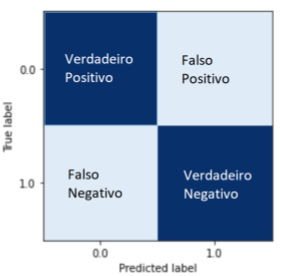

Após a classificação dos elementos pela modelagem preditiva, os resultados da predição são colocados em quatro diferentes quadrantes. Na diagonal principal (em azul escuro) estão os valores corretamente preditos, com Verdadeiros Positivos (VP) e Verdadeiros Negativos (VN). Fora dessa diagonal se encontram os erros cometidos, os Falsos Positivos (FN) e Falsos Negativos(FN) (Franceschi, 2019).

E a partir dos valores obtidos nos quadrantes, outras métricas podem ser extraídas, como a acurácia, com a seguinte fórmula:


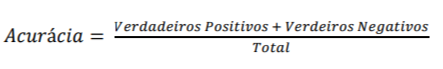

A acurácia é uma métrica simples que utiliza a razão entre todos os acertos do modelo (Verdadeiros Positivos e Verdadeiros Negativos) sobre a quantidade total de elementos usados na predição, ou seja, VP somado com VN, FP e FN.
E como a fórmula não utiliza um peso aplicado, é importante ressaltar que apenas utilizando a acurácia não é possível avaliar o desempenho dos modelos (Chen, et al, 2020).

#### 6.5.2 Resultados

In [ ]:
#Criando dataframe para os resultados gerados pelos modelos
dadosResultado = {
    'Acuracia': [acuraciaNaiveBow, acuraciaNaiveW2V, acuraciaRNW2V, acuraciaTranformers, accuracySVM],
    'Revocação': [revocacaoNaiveBow, revocacaoNaiveW2V, revocacaoRNW2V, revocacaoTranformers, revocacaoSVM],
}
nomesLinhas = ['Naive Bayes bag of words', 'Naive Bayes Word2Vec', 'Rede Neural Word2Vec', 'Tranformers', 'SVM']

tabelaResultados = pd.DataFrame(dadosResultado, index=nomesLinhas)

In [ ]:
#Visualização dos resultados
tabelaResultados

,Acuracia,Revocação
Naive Bayes bag of words,0.723191,0.713909
Naive Bayes Word2Vec,0.458805,0.352434
Rede Neural Word2Vec,0.642136,0.632992
Tranformers,0.765456,0.764755
SVM,0.474725,0.454713


Como foi possivel observar acima, foram feitos 3 modelos para utilização dos resultados de BOW e do Word2Vec. Sendo eles:

1.   6.1 - Naive Bayes bag of words, com 0.72 de acurácia.
2.   6.2 - Naive Bayes Word2Vec, com 0.5 de acurácia.
1.   6.3 - Rede Neural Word2Vec, com 0.649 de acurácia.


Vale mencionar que a principal metrica utilizada para medir o desenpenho dos modelo foi a acurácia.

#### 6.5.3 Matrizes de confusão

Abaixo esta a função utilizada para plotar as matrizes:

In [ ]:
def plotarMatriz(matriz):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão")
    plt.xlabel(" valor previsto")
    plt.ylabel("Valor verdadeiro")
    plt.show()

Matriz de confusão do NaiveBayes com BOW:

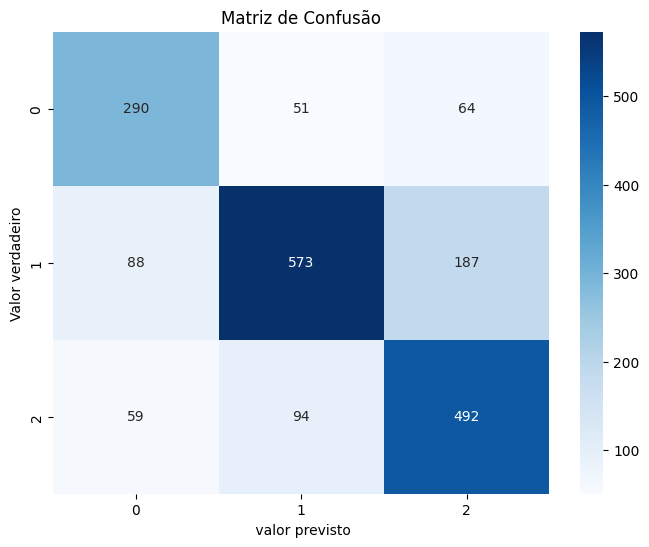

In [ ]:
plotarMatriz(matrizNaiveBow)

Matriz de confusão do Naive Bayes com Word2Vec

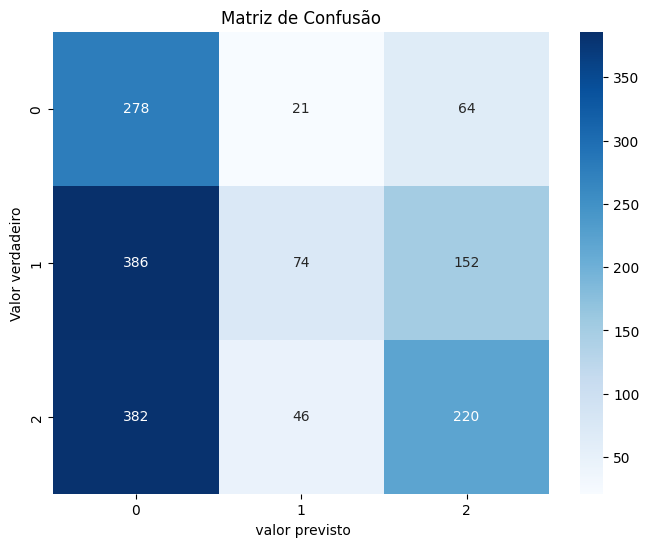

In [ ]:
plotarMatriz(matrizNaiveW2V)

Matriz de confusão da Rede Neural com Word2Vec

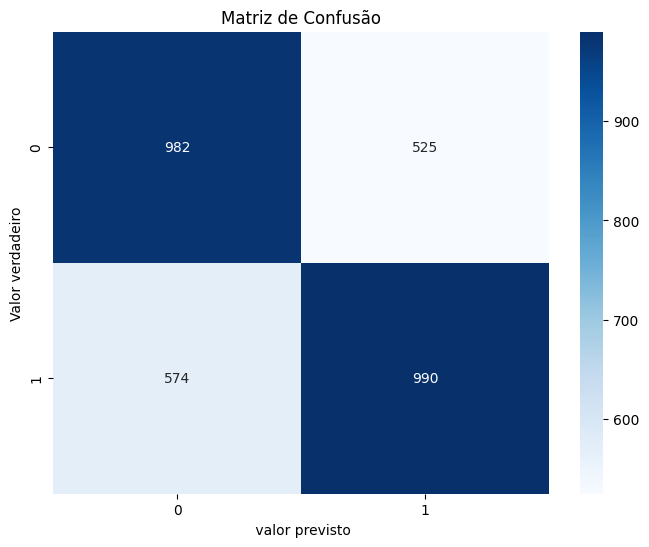

In [ ]:
plotarMatriz(matrizRNW2V)

Matriz de confusão transformers

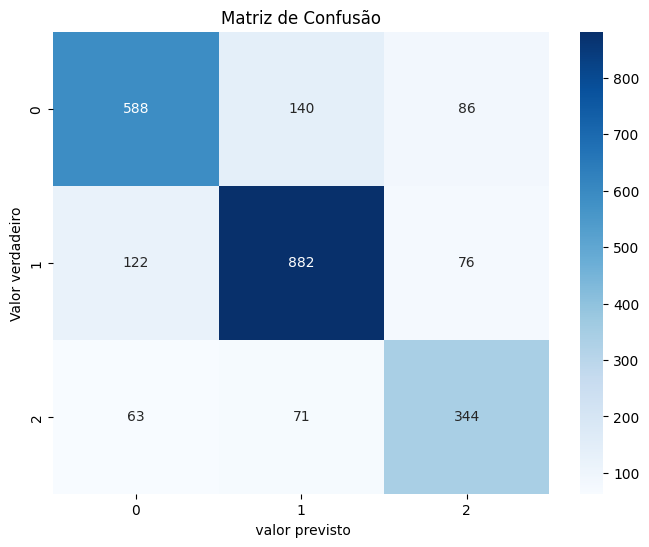

In [ ]:
plotarMatriz(matrizTransformers)

Matriz de confusão SVM

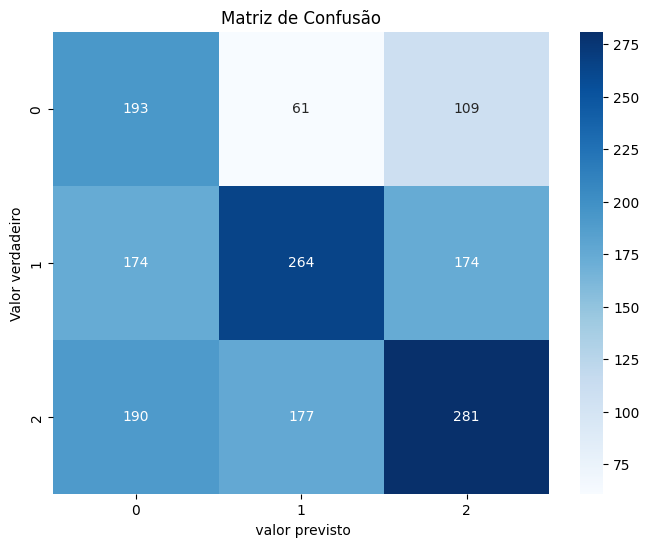

In [ ]:
plotarMatriz(matrizSVM)

Também vale mencionar, que a rede Neural Word2VEC a matriz de confusão do modelo foi analisada, contendo 883 verdadeiros positivos, 628 falso positivos, 451 falso negativos e 1113 verdadeiros negativos. Indicando uma tendência do modelo a ter acertos mais precisos sobre comentários negativos. Sendo esse um bom indício, uma vez que essa é a classe mais importante de ser corretamente classificada.

#### 6.5.4 Conclusão

Os resultados que tiveram os melhores resultados foram o do Naive Bayes com Bag of words e a rede neural com Word2Vec. Sendo o menor deles o Naive Bayes com Word2Vec, uma vez que ele não e um input adequado para o modelo. 
Ja entre os dois modelos com maiores resultados, o que se destacou foi o Naive Bayes com bag of words, se destacando com 7% a mais de acurácia que a rede neural.
Também sendo importante destacar a importância da aplicação de outras métricas de avaliação, como revocação, que identifica a relação entre Verdadeiros Positivos com Falsos Negativos.

### 6.6 Referências

CHEN, D., NIGRI, E., OLIVEIRA, G.,SEPULVENE, L., ALVES, T.: Métricas de Avaliação em Machine Learning: Classificação - Kunumi Blog, medium, 2020.

FRANCESCHI, P, R.: Modelagens Preditivas de Churn: O Caso do Banco do Brasil, Universidade do Vale do Rio dos Sinos, 2019.